In [1]:
import importlib
 
if importlib.util.find_spec('fsspec') is None:
  !pip install fsspec
if importlib.util.find_spec('s3fs') is None:
  !pip install s3fs

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 6.5MB 7.5MB/s 
     |████████████████████████████████| 1.3MB 43.2MB/s 
     |████████████████████████████████| 552kB 45.2MB/s 
     |████████████████████████████████| 143kB 45.8MB/s 
     |████████████████████████████████| 296kB 42.9MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=248ffe17f1222bc9fe64f8fe45b28dae181eb2155a5c7f1f95f1cea12f42ab8a
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Read the data

In [3]:
#read csv file
df = pd.read_csv('s3://lfspf/Portfolio.csv',parse_dates=True,index_col='T')

In [4]:
df= df.loc[:,['DAX', 'NKY', 'SPX', 'SX5E', 'SX7E', 'SXAP', 'SXKP']].copy()

Correlations are easy with the function `corr()` 

In [5]:
corr = df.corr()
corr

,DAX,NKY,SPX,SX5E,SX7E,SXAP,SXKP
DAX,1.000000,0.122709,0.491536,0.968650,0.830700,0.935052,0.869604
NKY,0.122709,1.000000,0.275345,0.150608,0.105472,0.097352,0.212743
SPX,0.491536,0.275345,1.000000,0.535560,0.507980,0.409250,0.531390
SX5E,0.968650,0.150608,0.535560,1.000000,0.905763,0.898689,0.909858
SX7E,0.830700,0.105472,0.507980,0.905763,1.000000,0.756039,0.819464
SXAP,0.935052,0.097352,0.409250,0.898689,0.756039,1.000000,0.803923
SXKP,0.869604,0.212743,0.531390,0.909858,0.819464,0.803923,1.000000


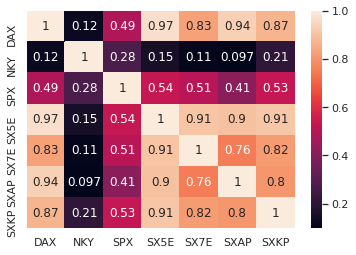

In [6]:
sns.heatmap(corr,annot=True)

With the right parameters, this becomes a lot better

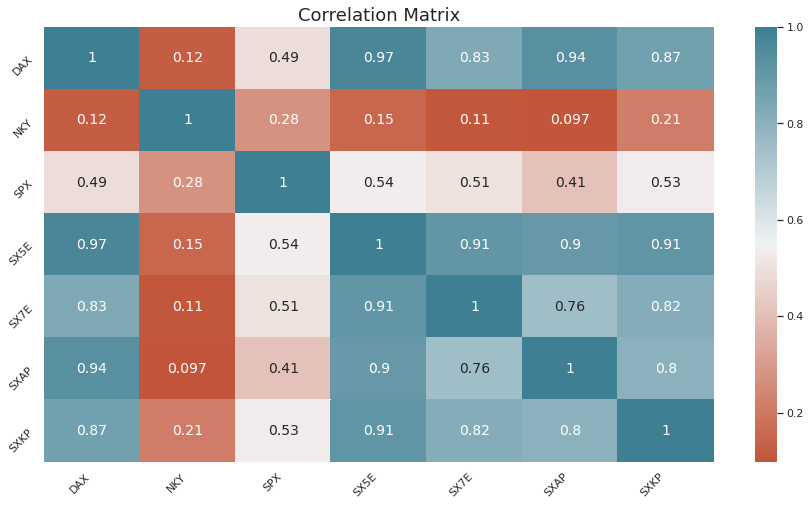

In [7]:
fig = plt.subplots(1,1,figsize=(15,8))
ax = sns.heatmap(corr,
                 annot=True,
                 annot_kws={'fontsize':14},
                cmap=sns.diverging_palette(20, 220, n=200))
ax.set_title('Correlation Matrix',fontsize=18)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
    horizontalalignment='right'
);